In [1]:
import sys
# For Unix base OS
sys.path.append('../stableBL/')
# For Windows OS
# sys.path.append('..\stableBL\')
from pgo import ContinuousAgent
import torch
import numpy as np
import gymnasium as gym

In [2]:
# Using deterministic random to ensure that initial weights will be the same
torch.manual_seed(42)
print("finish")

finish


In [3]:
env = gym.make("MountainCarContinuous-v0")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_low = env.action_space.low[0]
action_high = env.action_space.high[0]
print(state_dim, action_dim, action_low, action_high)

2 1 -1.0 1.0


In [4]:
agent = ContinuousAgent(state_dim, action_dim)

In [6]:
rewards = []
min_action = 1e9

for episode in range(500):
    state, _ = env.reset()
    episode_reward = 0
    done = False
    step_action = 0
    
    while not done:
        action, log_prob = agent.select_action(state, action_low, action_high)
        next_state, reward, done, _, _ = env.step(np.array([action]))
        agent.store_outcome(reward, log_prob)
        state = next_state
        episode_reward += reward
        
        step_action += 1
        
        if episode > 0 and step_action > min_action:
            print(f"Failed under minimum {step_action}")
            break
    
    # Just to set the limit of the exploration which causing long training time
    if step_action < min_action and step_action > 500 and done:
        print(f"Success under minimum {step_action}")
        min_action = max(step_action, 1000)
        
    agent.update_policy()
    rewards.append(episode_reward)
    
    if episode % 10 == 0:
        print(f"Episode {episode}, Total Reward: {episode_reward}")

Success under minimum 19281
Episode 0, Total Reward: -897.6063311725565
Failed under minimum 19282
Success under minimum 11095
Success under minimum 4523
Success under minimum 1183
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Episode 10, Total Reward: -61.557006386262564
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Episode 20, Total Reward: -61.826984921398086
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Failed under minimum 1184
Success under minimum 832
Failed under minimum 1001
Failed under minimum 1001
Success under minimum 719
Failed under minimum 1001
Episode 30, Total Reward: -50.47684629828508
Failed

KeyboardInterrupt: 

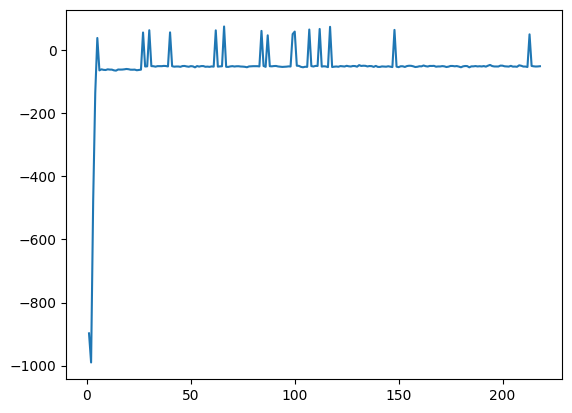

In [7]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(1, len(rewards), len(rewards), dtype=np.int64), rewards)
plt.show()